#  Notebook to look at the docking results

## This uses the results from the SMINA docking run using the ConformationGenerationDocking.ipynb

In [ ]:
import sys
from collections import defaultdict
import numpy as np
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
import pandas as pd
IPythonConsole.ipython_3d=True
%pylab inline

RDKit WARNING: [08:55:34] Enabling RDKit 2019.09.1 jupyter extensions


Populating the interactive namespace from numpy and matplotlib


In [ ]:
# File locations, this is the final output from ConformationGenerationDocking.ipynb
DockingsdfFilePath = 'Alldata.sdf.gz' # This file is the results of the docking experiment.

## Import the docking/scoring results into a dataframe

In [ ]:
docked_df = PandasTools.LoadSDF(DockingsdfFilePath,molColName='Molecule', removeHs=False)

minimizedAffinity          name RFScoreVS_v2            ID  \
0          -5.30895  ART 15342099     6.148551  ART 15342099   
1          -5.26728  ART 15342099     6.127652  ART 15342099   
2          -5.04994  ART 15342099     6.090561  ART 15342099   
3          -4.74888  ART 15342099     6.067428  ART 15342099   
4          -4.72620  ART 15342099     6.106997  ART 15342099   

                                            Molecule  
0  <img data-content="rdkit/molecule" src="data:i...  
1  <img data-content="rdkit/molecule" src="data:i...  
2  <img data-content="rdkit/molecule" src="data:i...  
3  <img data-content="rdkit/molecule" src="data:i...  
4  <img data-content="rdkit/molecule" src="data:i...
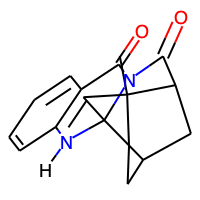
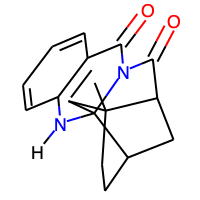
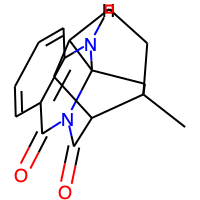
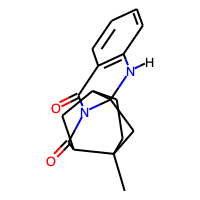
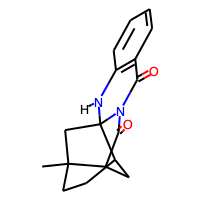

In [ ]:
docked_df.head(5) #view the first 5 rows

## Sort the rows on either minimizedAffinity or the scoring funtion RFScoreVS_v2

In [ ]:
#docked_df.sort_values(["minimizedAffinity"], axis=0, ascending=False, inplace=True) #sort by minimised affinity
docked_df.sort_values(["RFScoreVS_v2"], axis=0, ascending=False, inplace=True) #or sort by scoring function

minimizedAffinity          name RFScoreVS_v2            ID  \
4632          -5.03851  SYN 13975176     6.312364  SYN 13975176   
185           -3.77326  ASN 10790639     6.305832  ASN 10790639   
356           -5.91577  AEM 10028511      6.30018  AEM 10028511   
4565          -5.96147  SYN 13975163     6.298634  SYN 13975163   
4059          -5.11896  LMG 16204894     6.294883  LMG 16204894   

                                               Molecule  
4632  <img data-content="rdkit/molecule" src="data:i...  
185   <img data-content="rdkit/molecule" src="data:i...  
356   <img data-content="rdkit/molecule" src="data:i...  
4565  <img data-content="rdkit/molecule" src="data:i...  
4059  <img data-content="rdkit/molecule" src="data:i...
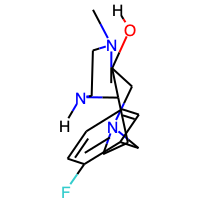
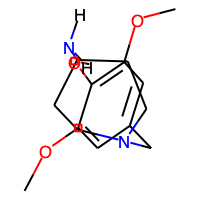
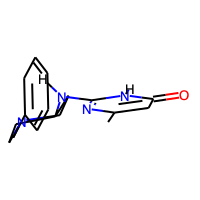
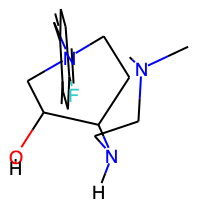
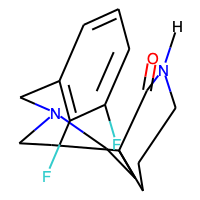

In [ ]:
docked_df.head(5) # rows should now be sorted with best scoring top

## Export the top scoring molecules, edit "head(1)" to the number you want to export

In [ ]:
selectedPose = 'selectedpose.sdf'

In [ ]:
#exporting 5 structures
PandasTools.WriteSDF(docked_df.head(5), selectedPose, molColName="Molecule", idName="ID", properties=list(docked_df.columns))

minimizedAffinity          name RFScoreVS_v2            ID  \
0          -5.03851  SYN 13975176     6.312364  SYN 13975176   
1          -3.77326  ASN 10790639     6.305832  ASN 10790639   
2          -5.91577  AEM 10028511      6.30018  AEM 10028511   
3          -5.96147  SYN 13975163     6.298634  SYN 13975163   
4          -5.11896  LMG 16204894     6.294883  LMG 16204894   

                                            Molecule  
0  <img data-content="rdkit/molecule" src="data:i...  
1  <img data-content="rdkit/molecule" src="data:i...  
2  <img data-content="rdkit/molecule" src="data:i...  
3  <img data-content="rdkit/molecule" src="data:i...  
4  <img data-content="rdkit/molecule" src="data:i...
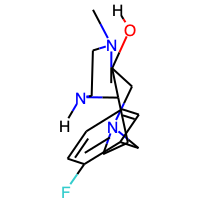
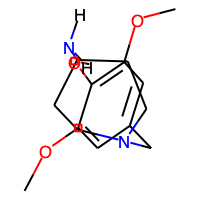
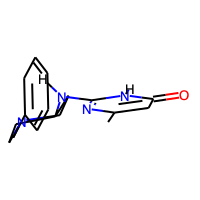
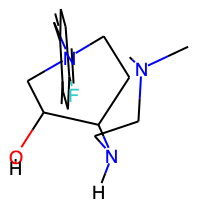
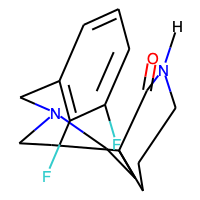

In [ ]:
selecteddocked_df = PandasTools.LoadSDF(selectedPose,molColName='Molecule', removeHs=False)
selecteddocked_df

## Adding hydrogens to the molecules using Openbabel (conda install openbabel)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

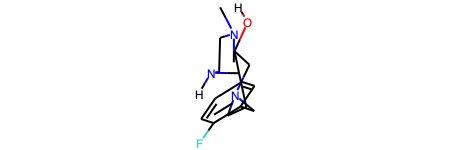

In [ ]:
m = Chem.MolFromMolFile(selectedPose, removeHs=False) #View first structure, No hydrogens
m
#view structure using 3Dmol.js
#you should be able to view, rotate structure

## Using pybel - A Python module that simplifies access to the Open Babel API

In [ ]:
selectedPose = 'selectedpose.sdf'
selectedPoseH = 'selectedposeH.sdf' #output file for structures with added hydrogens
from openbabel import pybel

largeSDfile = pybel.Outputfile("sdf", selectedPoseH, overwrite=True)

for molecule in pybel.readfile("sdf", selectedPose):
    molecule.OBMol.AddHydrogens()
    largeSDfile.write(molecule)




You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

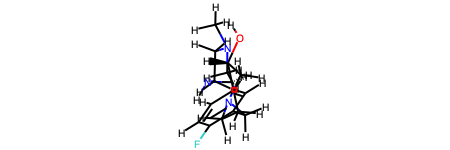

In [ ]:
mH = Chem.MolFromMolFile(selectedPoseH, removeHs=False) #View first structure, Hydrogens present
mH
#structures should now have hydrogens added

## The docked structures can now be opened with PYMOL together with the protein structure (protein_minus_ligand.pdb).

In [ ]:
# In the Terminal change directory to the folder containing the Jupyter notebook
# cd path to /Visualisation
# then type pymol -R in a Terminal window to start pymol

In [ ]:
import xmlrpc.client as xmlrpclib

In [ ]:
ProteinForDocking = 'protein_minus_ligand.pdb'
selectedPoseH = 'selectedposeH.sdf' #
ProteinForDocking

'protein_minus_ligand.pdb'

In [ ]:
cmd = xmlrpclib.ServerProxy('http://localhost:9123')

In [ ]:
#some examples of commands to control Pymol window
#Many thanks to Manish Sud

In [ ]:
# setting some global values
cmd.set("transparency", 0.25, "", 0)
cmd.set("label_font_id", 7)


In [ ]:
#Loading protein_minus_ligand.pdb and setting up view for protein
cmd.load("protein_minus_ligand.pdb", "protein_minus_ligand")
cmd.hide("everything", "protein_minus_ligand")
cmd.show("cartoon", "protein_minus_ligand")
#util.cbag("protein_minus_ligand", _self = cmd)

In [ ]:
cmd.disable("protein_minus_ligand") #hide protein

In [ ]:
cmd.enable("protein_minus_ligand") #display protein

In [ ]:
#Loading selected poses
cmd.load("selectedposeH.sdf", "selectedposeH")
cmd.hide("everything", "selectedposeH")
#util.cbag("selectedposeH", _self = cmd)
cmd.show("sticks", "selectedposeH")
cmd.enable("selectedposeH")

In [ ]:
#select residues in the binding pocket
cmd.create("pocket", "((byresidue protein_minus_ligand within 5.0 of selectedposeH) and (not solvent) and (not hydro))")
cmd.hide("everything", "pocket")
cmd.show("lines", "(pocket)")
cmd.enable("pocket")
cmd.set("label_color", "magenta", "pocket")


In [ ]:
#create surface for pocket
cmd.create("pocket_surface", "pocket")
cmd.hide("everything", "pocket_surface")
cmd.show("lines", "pocket_surface")
cmd.hide("(pocket_surface and hydro)")
cmd.show("surface", "pocket_surface")


In [ ]:
cmd.disable("pocket_surface") #remove surface


In [ ]:
cmd.enable("pocket_surface") # display surface

In [ ]:
#assign polar interactions
cmd.dist("pocket_polar_contacts","(selectedposeH)","(pocket)",  4.0,  1,  2,  1, 1)
cmd.enable("pocket_polar_contacts")
cmd.set("label_color", "orange", "pocket_polar_contacts")

In [ ]:
#assign hydrogen bonds
cmd.dist("hbonds","(selectedposeH)","(pocket)", 3.2, 2)
cmd.set("label_color", "red", "hbonds")

In [ ]:
#assign hydrophobic contacts
cmd.dist("pocket_hydrophobic_contacts","(((selectedposeH) and (elem C) and (not bound_to (donors or acceptors))))","(((pocket) and (elem C) and (not bound_to (donors or acceptors))))",  4.0, 0,  1,  1, 1)
cmd.enable("pocket_hydrophobic_contacts")
cmd.set("label_color", "purpleblue", "pocket_hydrophobic_contacts")

In [ ]:
cmd.rock(True) #rock display in Y-axis back and forth

1

In [ ]:
cmd.rock(False) #stop rocking

0